In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
combined_results = 'combined_results.csv'
data = pd.read_csv(combined_results)

In [3]:
data.head()

,last name,fips,county,votes,state,total votes,winner,percent votes,PST045214,PST040210,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,Biden,1131,Wilcox,1864,AL,2148,1,0.867784,11098,11665,...,1,0,0,0,0,1,0,0,0,0
1,Sanders,1131,Wilcox,284,AL,2148,0,0.132216,11098,11665,...,0,1,1,1,1,0,1,1,1,1
2,Biden,1129,Washington,1109,AL,1265,1,0.876680,16834,17583,...,1,0,0,0,0,1,0,0,0,0
3,Sanders,1129,Washington,156,AL,1265,0,0.123320,16834,17583,...,0,1,1,1,1,0,1,1,1,1
4,Biden,1127,Walker,1390,AL,1928,1,0.720954,65471,67023,...,1,0,0,0,0,1,0,0,0,0


In [4]:
training_data = data.drop(['last name', 'fips', 'county', 'state', 'votes', 'total votes', 'percent votes'], axis=1)
training_data.head()

,winner,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,1,11098,11665,-4.9,11670,5.7,24.8,17.7,52.4,28.1,...,1,0,0,0,0,1,0,0,0,0
1,0,11098,11665,-4.9,11670,5.7,24.8,17.7,52.4,28.1,...,0,1,1,1,1,0,1,1,1,1
2,1,16834,17583,-4.3,17581,4.9,22.5,17.0,51.2,66.0,...,1,0,0,0,0,1,0,0,0,0
3,0,16834,17583,-4.3,17581,4.9,22.5,17.0,51.2,66.0,...,0,1,1,1,1,0,1,1,1,1
4,1,65471,67023,-2.3,67023,5.8,22.1,18.2,51.4,91.3,...,1,0,0,0,0,1,0,0,0,0


In [5]:
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
winner,2392.0,0.500418,0.500104,0.0,0.0,1.0,1.00,1.0
PST045214,2392.0,106353.693144,407055.883581,86.0,12012.5,25396.0,62883.75,10116705.0
PST040210,2392.0,101693.540134,388740.462516,82.0,12165.5,25198.5,61203.25,9818664.0
PST120214,2392.0,0.811037,4.350972,-17.0,-2.0,0.1,3.00,18.2
POP010210,2392.0,101685.627090,388733.555922,82.0,12165.5,25201.5,61235.00,9818605.0
...,...,...,...,...,...,...,...,...
border_crossing_penalties,2392.0,0.500000,0.500105,0.0,0.0,0.5,1.00,1.0
medicare_for_all,2392.0,0.500000,0.500105,0.0,0.0,0.5,1.00,1.0
private_insurance,2392.0,0.500000,0.500105,0.0,0.0,0.5,1.00,1.0
eliminate_electoral_college,2392.0,0.500000,0.500105,0.0,0.0,0.5,1.00,1.0


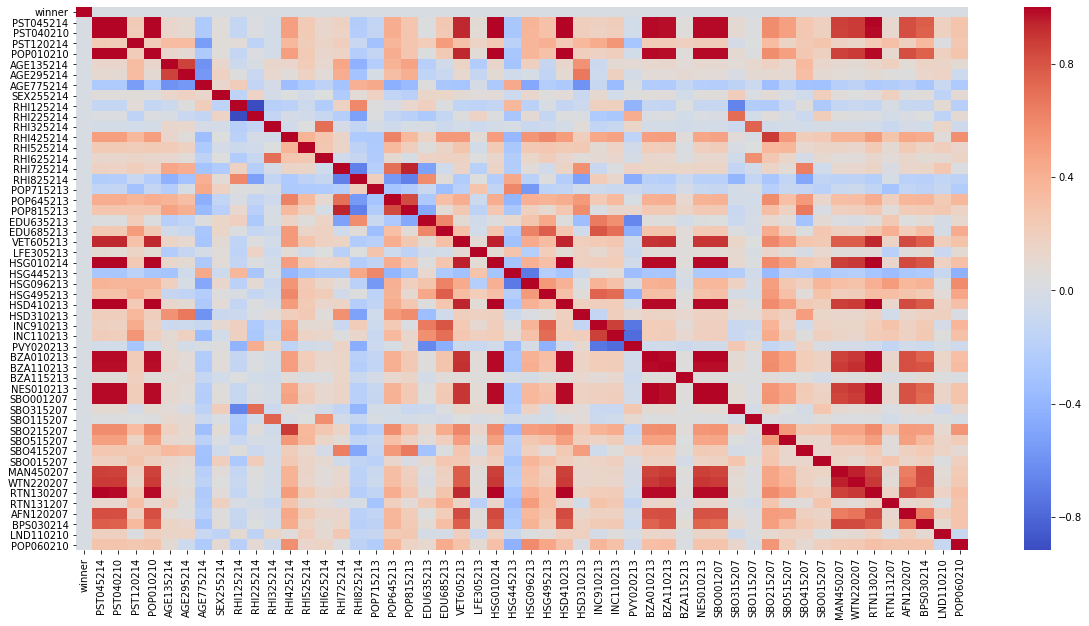

In [6]:


plt.figure(figsize=(20,10))

sns.heatmap(training_data[['winner', 'PST045214', 'PST040210', 'PST120214', 'POP010210',
       'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214',
       'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214',
       'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213',
       'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213',
       'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213',
       'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207',
       'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207',
       'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214',
       'LND110210', 'POP060210']].corr(), cmap='coolwarm')

In [7]:
training_data.columns

Index(['winner', 'PST045214', 'PST040210', 'PST120214', 'POP010210',
       'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214',
       'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214',
       'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213',
       'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213',
       'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213',
       'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207',
       'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207',
       'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214',
       'LND110210', 'POP060210', 'Age', 'Gender', 'Net Worth',
       '% Donations Under $200', 'Candidate Committee Money', 'Outside Money',
       'Twitter Followers', 'legalize_cannabis', 'vote_incarcerated',
       'gun_licenses', 'tax_wealthy_assets', 'paid_family_leave',
     

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = training_data.drop('winner',axis=1)
y = training_data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:

from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=600)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
predictions = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[322  42]
 [ 34 320]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       364
           1       0.88      0.90      0.89       354

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



In [16]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.0519, 'LND110210'), (0.0509, 'RHI225214'), (0.0313, 'HSG495213'), (0.0266, 'EDU635213'), (0.021, 'RHI125214'), (0.0203, 'RHI725214'), (0.0192, 'POP815213'), (0.0191, 'HSG445213'), (0.0186, 'HSG096213'), (0.0175, 'SEX255214'), (0.0164, 'medicare_for_all'), (0.016, 'POP645213'), (0.0158, 'RHI325214'), (0.0158, 'EDU685213'), (0.0156, 'POP060210'), (0.0154, 'RHI825214'), (0.0153, 'legalize_cannabis'), (0.015, 'RHI425214'), (0.0148, 'gun_licenses'), (0.0148, 'POP715213'), (0.0147, 'LFE305213'), (0.0138, 'Candidate Committee Money'), (0.0135, 'AGE295214'), (0.0132, 'HSD310213'), (0.0128, 'RTN131207'), (0.0127, 'AFN120207'), (0.0126, 'Net Worth'), (0.0125, 'tax_wealthy_assets'), (0.0125, 'cancel_student_debt'), (0.0123, 'ban_fracking'), (0.0123, 'INC110213'), (0.012, 'raise_income_tax'), (0.0116, 'eliminate_electoral_college'), (0.0116, 'RHI525214'), (0.0114, 'paid_family_leave'), (0.0113, 'north_korea_meet'), (0.0113, 'AGE135214'), (0.0112, 'PVY020213'), (

In [17]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

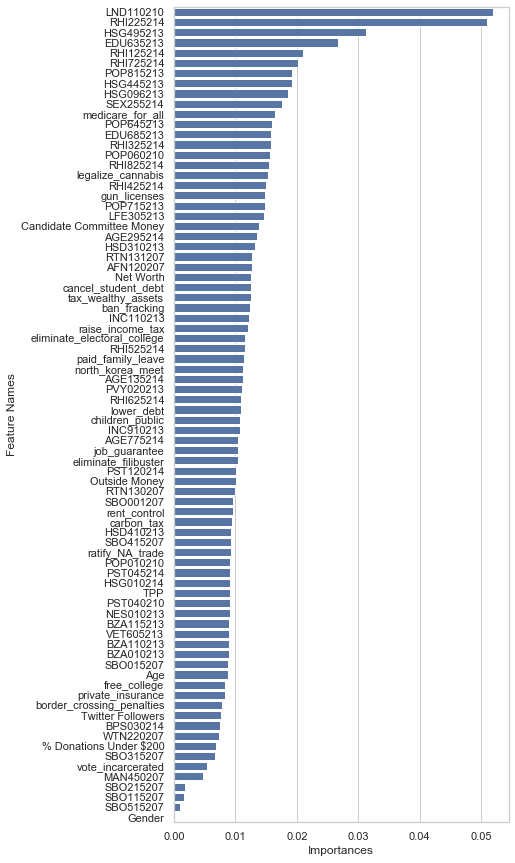

In [18]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

In [19]:
predictions_df = pd.read_csv('predictions.csv')

In [20]:

predictions_data = predictions_df.drop(['state', 'state_abbreviation', 'county', 'fips','candidate'], axis=1)
predictions_data.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,...,0,1,1,1,1,0,1,1,1,1
1,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,...,1,0,0,0,0,1,0,0,0,0
2,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,...,0,1,1,1,1,0,1,1,1,1
3,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,...,1,0,0,0,0,1,0,0,0,0
4,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,...,0,1,1,1,1,0,1,1,1,1


In [21]:
predictions = rfc.predict(predictions_data)

In [22]:
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [23]:
predictions_df['predicted winner'] = predictions
predictions_df.head()

,state,state_abbreviation,county,fips,candidate,PST045214,PST040210,PST120214,POP010210,AGE135214,...,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted winner
0,Alabama,AL,Autauga,1001,Sanders,55395,54571,1.5,54571,6.0,...,1,1,1,1,0,1,1,1,1,0
1,Alabama,AL,Autauga,1001,Biden,55395,54571,1.5,54571,6.0,...,0,0,0,0,1,0,0,0,0,1
2,Alabama,AL,Baldwin,1003,Sanders,200111,182265,9.8,182265,5.6,...,1,1,1,1,0,1,1,1,1,0
3,Alabama,AL,Baldwin,1003,Biden,200111,182265,9.8,182265,5.6,...,0,0,0,0,1,0,0,0,0,1
4,Alabama,AL,Barbour,1005,Sanders,26887,27457,-2.1,27457,5.7,...,1,1,1,1,0,1,1,1,1,0


In [24]:
predictions_df.to_csv('prediction_results.csv')

In [25]:
winner_counts = predictions_df.groupby(['candidate', 'state'])['predicted winner'].sum().reset_index()

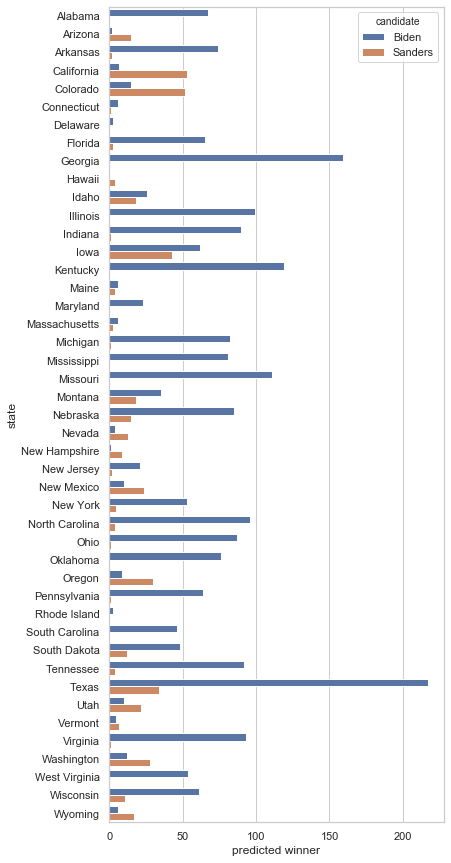

In [26]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted winner", y = 'state', data = winner_counts, hue = 'candidate')

In [27]:
county_json = pd.read_json('data/county.geo.json')

In [28]:
county_json.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."


In [29]:
state = county_json['features'][0]['properties']['state']

In [30]:
geoid = county_json['features'][10]['properties']['GEOID10']

In [31]:
int(county_json['features'][100]['properties']['GEOID10'])


6103

In [77]:
county_json

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
...,...,...
3216,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
3217,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
3218,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."
3219,FeatureCollection,"{'type': 'Feature', 'properties': {'STATEFP10'..."


In [33]:
fips = predictions_df['fips'].unique()

In [142]:
geojson = {'type': 'FeatureCollection', 'features': []}
i = 0
for fip in fips:
    df = predictions_df[predictions_df['fips'] == fip]
    try:
        winner = df[df['predicted winner'] == 1]['candidate']
        winner = winner.iloc[0]
    except:
        winner = 'Undetermined'
    try:
        loser = df[df['predicted winner'] == 0]['candidate']
        loser = loser.iloc[0]
    except:
        loser = 'Undetermined'
            
    for x in county_json['features']:
        if fip == int(x['properties']['GEOID10']):
            geometry = x['geometry']
    featureCollection = {
            'type': 'Feature',
            'properties': {
                    "winner" : winner,
                    "loser" : loser,
                    "county" : str(df['county'].iloc[0]),
                    "state" : str(df['state'].iloc[0]),
                    "state_abbr" : str(df['state_abbreviation'].iloc[0]),
                    "PST045214" : int(df['PST045214'].iloc[0]),
                    "PST040210" : int(df['PST040210'].iloc[0]),
                    "POP010210" : int(df['POP010210'].iloc[0]),
                    "AGE135214" : int(df['AGE135214'].iloc[0]),
                    "AGE295214" : int(df['AGE295214'].iloc[0]),
                    "AGE775214" : int(df['AGE775214'].iloc[0]),
                    "SEX255214" : int(df['SEX255214'].iloc[0]),
                    "RHI125214" : int(df['RHI125214'].iloc[0]),
                    "RHI225214" : int(df['RHI225214'].iloc[0]),
                    "RHI325214" : int(df['RHI325214'].iloc[0]),
                    "RHI425214" : int(df['RHI425214'].iloc[0]),
                    "RHI525214" : int(df['RHI525214'].iloc[0]),
                    "RHI625214" : int(df['RHI625214'].iloc[0]),
                    "RHI725214" : int(df['RHI725214'].iloc[0]),
                    "RHI825214" : int(df['RHI825214'].iloc[0]),
                    "POP715213" : int(df['POP715213'].iloc[0]),
                    "POP645213" : int(df['POP645213'].iloc[0]),
                    "POP815213" : int(df['POP815213'].iloc[0]),
                    "EDU635213" : int(df['EDU635213'].iloc[0]),
                    "EDU685213" : int(df['EDU685213'].iloc[0]),
                    "VET605213" : int(df['VET605213'].iloc[0]),
                    "LFE305213" : int(df['LFE305213'].iloc[0]),
                    "HSG010214" : int(df['HSG010214'].iloc[0]),
                    "HSG445213" : int(df['HSG445213'].iloc[0]),
                    "HSG096213" : int(df['HSG096213'].iloc[0]),
                    "HSG495213" : int(df['HSG495213'].iloc[0]),
                    "HSD410213" : int(df['HSD410213'].iloc[0]),
                    "HSD310213" : int(df['HSD310213'].iloc[0]),
                    "INC910213" : int(df['INC910213'].iloc[0]),
                    "INC110213" : int(df['INC110213'].iloc[0]),
                    "PVY020213" : int(df['PVY020213'].iloc[0]),
                    "BZA010213" : int(df['BZA010213'].iloc[0]),
                    "BZA115213" : int(df['BZA115213'].iloc[0]),
                    "NES010213" : int(df['NES010213'].iloc[0]),
                    "SBO001207" : int(df['SBO001207'].iloc[0]),
                    "SBO315207" : int(df['SBO315207'].iloc[0]),
                    "SBO115207" : int(df['SBO115207'].iloc[0]),
                    "SBO215207" : int(df['SBO215207'].iloc[0]),
                    "SBO515207" : int(df['SBO515207'].iloc[0]),
                    "SBO415207" : int(df['SBO415207'].iloc[0]),
                    "SBO015207" : int(df['SBO015207'].iloc[0]),
                    "MAN450207" : int(df['MAN450207'].iloc[0]),
                    "WTN220207" : int(df['WTN220207'].iloc[0]),
                    "RTN130207" : int(df['RTN130207'].iloc[0]),
                    "RTN131207" : int(df['RTN131207'].iloc[0]),
                    "AFN120207" : int(df['AFN120207'].iloc[0]),
                    "BPS030214" : int(df['BPS030214'].iloc[0]),
                    "LND110210" : int(df['LND110210'].iloc[0]),
                    "POP060210" : int(df['POP060210'].iloc[0])
            },
            'geometry': geometry,
    }
    geojson['features'].append(featureCollection)
    i = i + 1


    




In [143]:
output_filename = 'dataset.json'
with open(output_filename, 'w') as output_file:
    json.dump(geojson, output_file, indent=2) 

In [100]:
import geopandas as gpd
from geopandas.geoseries import *
from shapely.geometry import Point, Polygon

In [144]:
counties = gpd.read_file('dataset.json')

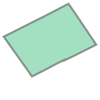

In [154]:
counties['geometry'][2220]

In [156]:
counties.to_file("counties.geojson", driver='GeoJSON')